In [636]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json

import matplotlib.pyplot as plt

In [637]:
load_dotenv()

True

In [638]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [639]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpca Secret Key type: <class 'str'>


In [640]:
current_date = pd.Timestamp("2020-01-05", tz="America/New_York").isoformat()

tickers = ["SPY", "AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT","QEP"]


timeframe = "1D"

In [641]:
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=current_date
).df

df_ticker

AAPL                                         \
                             open      high      low     close    volume   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.7800  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.2700  24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.1500  28984028   
2020-01-09 00:00:00-05:00  307.25  310.4300  306.200  309.7100  38540792   
2020-01-10 00:00:00-05:00  310.60  312.6700  308.250  310.3700  32304453   
...                           ...       ...      ...       ...       ...   
2021-01-08 00:00:00-05:00  132.43  132.6300  130.230  131.9900  93211863   
2021-01-11 00:00:00-05:00  129.19  130.1700  128.500  128.9800  84845947   
2021-01-12 00:00:00-05:00  128.50  129.6900  126.860  128.8199  83381829   
2021-01-13 00:00:00-05:00  128.76  131.4500  128.490  130.8900  77928722   
2021-01-14 00:00:00-05:00  130.80  131.0000  128.760  128.9200  78672922   

                              AMZN                                          \
                              open       high        low    close   volume   
2020-01-06 00:00:00-05:00  1860.00  1903.6900  1860.0000  1903.33  3598872   
2020-01-07 00:00:00-05:00  1904.50  1913.8900  1892.0433  1906.86  3638680   
2020-01-08 00:00:00-05:00  1898.68  1910.9999  1886.4448  1892.09  3032612   
2020-01-09 00:00:00-05:00  1909.89  1916.4961  1895.8038  1901.00  2762629   
2020-01-10 00:00:00-05:00  1905.37  1906.9400  1880.0000  1882.98  2605447   
...                            ...        ...        ...      ...      ...   
2021-01-08 00:00:00-05:00  3180.00  3190.6400  3142.2000  3182.70  3261271   
2021-01-11 00:00:00-05:00  3148.01  3156.3840  3110.0000  3115.75  3263070   
2021-01-12 00:00:00-05:00  3120.00  3142.1418  3086.0000  3120.88  3009716   
2021-01-13 00:00:00-05:00  3128.44  3189.9500  3122.0800  3166.24  2985766   
2021-01-14 00:00:00-05:00  3167.52  3178.0000  3120.5900  3129.32  2668943   

                           ...       SPY                                      \
                           ...      open    high       low   close    volume   
2020-01-06 00:00:00-05:00  ...  320.4800  323.73  320.3600  323.67  41271531   
2020-01-07 00:00:00-05:00  ...  323.0200  323.54  322.2400  322.73  33333873   
2020-01-08 00:00:00-05:00  ...  322.9400  325.78  322.6900  324.42  53033838   
2020-01-09 00:00:00-05:00  ...  326.1600  326.73  325.5200  326.62  40652148   
2020-01-10 00:00:00-05:00  ...  327.2899  327.46  325.2000  325.70  42585254   
...                        ...       ...     ...       ...     ...       ...   
2021-01-08 00:00:00-05:00  ...  380.5900  381.49  377.1000  381.24  60275466   
2021-01-11 00:00:00-05:00  ...  377.8500  380.58  377.7189  378.74  44814805   
2021-01-12 00:00:00-05:00  ...  378.8900  379.86  376.3600  378.81  45364896   
2021-01-13 00:00:00-05:00  ...  378.6900  380.86  377.8500  379.76  38355050   
2021-01-14 00:00:00-05:00  ...  380.5900  381.13  378.1000  378.45  41045335   

                             TSLA                                        
                             open    high       low     close    volume  
2020-01-06 00:00:00-05:00  440.47  451.56  440.0000  451.4001   9807049  
2020-01-07 00:00:00-05:00  461.40  471.63  453.3550  469.1700  17164802  
2020-01-08 00:00:00-05:00  473.70  498.49  468.2300  492.0900  29492388  
2020-01-09 00:00:00-05:00  497.10  498.80  472.8700  481.4900  26229707  
2020-01-10 00:00:00-05:00  481.79  484.94  473.7000  477.9600  12193711  
...                           ...     ...       ...       ...       ...  
2021-01-08 00:00:00-05:00  856.00  884.49  838.3900  880.0300  71814487  
2021-01-11 00:00:00-05:00  849.40  854.43  803.6222  811.1800  55755718  
2021-01-12 00:00:00-05:00  831.00  868.00  827.3400  849.2200  43550554  
2021-01-13 00:00:00-05:00  852.76  860.47  832.0000  854.4200  31050197  
2021-01-14 00:00:00-05:00  843.39  863.00  838.7500  844.2100  29982086  

[260 rows x 60 column

In [642]:
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]['close']
# Preview DataFrame
# YOUR CODE HERE!
df_closing_prices

,SPY,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT,QEP
2020-01-06 00:00:00-05:00,323.67,299.7800,451.4001,1903.33,145.65,212.5855,1397.43,12.140,3.6900,9.150,159.02,4.690
2020-01-07 00:00:00-05:00,322.73,298.2700,469.1700,1906.86,145.68,213.0500,1395.55,12.055,3.2500,9.250,157.60,4.690
2020-01-08 00:00:00-05:00,324.42,303.1500,492.0900,1892.09,145.45,215.3000,1405.48,11.930,3.3850,9.250,160.14,4.385
2020-01-09 00:00:00-05:00,326.62,309.7100,481.4900,1901.00,144.80,218.3100,1420.15,11.900,3.4700,9.275,162.09,4.240
2020-01-10 00:00:00-05:00,325.70,310.3700,477.9600,1882.98,144.60,218.0700,1429.37,11.670,3.5100,9.250,161.32,4.070
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08 00:00:00-05:00,381.24,131.9900,880.0300,3182.70,178.68,267.5400,1798.00,11.340,58.9100,9.000,219.55,2.800
2021-01-11 00:00:00-05:00,378.74,128.9800,811.1800,3115.75,179.12,256.8100,1756.28,11.455,62.7250,9.300,217.50,2.870
2021-01-12 00:00:00-05:00,378.81,128.8199,849.2200,3120.88,175.98,250.9100,1737.67,11.775,61.9400,9.775,214.93,3.095
2021-01-13 00:00:00-05:00,379.76,130.8900,854.4200,3166.24,176.12,251.6400,1747.40,11.560,62.1301,9.780,216.41,3.050


In [643]:
df_closing_prices.index = df_closing_prices.index.date

In [644]:
df_closing_prices

,SPY,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT,QEP
2020-01-06,323.67,299.7800,451.4001,1903.33,145.65,212.5855,1397.43,12.140,3.6900,9.150,159.02,4.690
2020-01-07,322.73,298.2700,469.1700,1906.86,145.68,213.0500,1395.55,12.055,3.2500,9.250,157.60,4.690
2020-01-08,324.42,303.1500,492.0900,1892.09,145.45,215.3000,1405.48,11.930,3.3850,9.250,160.14,4.385
2020-01-09,326.62,309.7100,481.4900,1901.00,144.80,218.3100,1420.15,11.900,3.4700,9.275,162.09,4.240
2020-01-10,325.70,310.3700,477.9600,1882.98,144.60,218.0700,1429.37,11.670,3.5100,9.250,161.32,4.070
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,381.24,131.9900,880.0300,3182.70,178.68,267.5400,1798.00,11.340,58.9100,9.000,219.55,2.800
2021-01-11,378.74,128.9800,811.1800,3115.75,179.12,256.8100,1756.28,11.455,62.7250,9.300,217.50,2.870
2021-01-12,378.81,128.8199,849.2200,3120.88,175.98,250.9100,1737.67,11.775,61.9400,9.775,214.93,3.095
2021-01-13,379.76,130.8900,854.4200,3166.24,176.12,251.6400,1747.40,11.560,62.1301,9.780,216.41,3.050


In [645]:
df_closing_prices.std()

SPY       33.040949
AAPL     114.660752
TSLA     411.089455
AMZN     540.143419
DIS       20.986386
FB        38.329099
GOOGL    179.286356
GE         2.239673
NIO       16.922392
F          1.463232
MSFT      22.882225
QEP        0.946817
dtype: float64

In [646]:
df_current_price = df_closing_prices.tail(1)
df_current_price

,SPY,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT,QEP
2021-01-14,378.45,128.92,844.21,3129.32,173.57,245.71,1731.6,11.66,60.88,10.17,213.02,3.055


In [647]:
price_change_df = df_closing_prices.pct_change()
daily_price_change = price_change_df.dropna()

In [648]:
daily_prices_std = daily_price_change.std()
daily_prices_std

SPY      0.021351
AAPL     0.054755
TSLA     0.073944
AMZN     0.024309
DIS      0.030515
FB       0.029036
GOOGL    0.024204
GE       0.039294
NIO      0.064183
F        0.035262
MSFT     0.027610
QEP      0.107764
dtype: float64

In [649]:
annual_std = daily_prices_std * np.sqrt(252)
annual_std

SPY      0.338932
AAPL     0.869216
TSLA     1.173820
AMZN     0.385890
DIS      0.484407
FB       0.460930
GOOGL    0.384228
GE       0.623766
NIO      1.018873
F        0.559762
MSFT     0.438299
QEP      1.710708
dtype: float64

In [650]:
SPY_df = daily_price_change["SPY"]
spy500_return = SPY_df.mean() * 252
spy500_return

0.20993107294323798

In [651]:
standard_df = pd.DataFrame(annual_std, columns=["StandardDev"])
standard_df

,StandardDev
SPY,0.338932
AAPL,0.869216
TSLA,1.173820
AMZN,0.385890
DIS,0.484407
FB,0.460930
GOOGL,0.384228
GE,0.623766
NIO,1.018873
F,0.559762


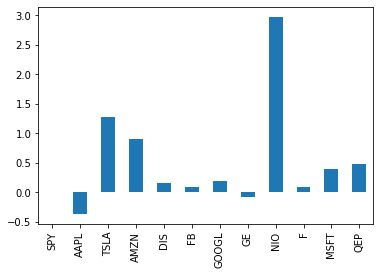

In [652]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf = spy500_return #1% risk free rate
sharpe_ratio = daily_price_change.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpe_ratio.plot.bar()

Excess return is the return on the portfolio less risk-free rate.

Therefore, excess return is negative when the (realized or expected) return on the portfolio (or fund, trading strategy, or investment) is lower than the risk-free interest rate (typically a money market rate or treasury yield).

Sharpe ratio is negative when the investment return is lower than the risk-free rate.

In [653]:
sharpe_ratio_df = pd.DataFrame(sharpe_ratio, columns=["SharpeRatio"])
sharpe_ratio_df

,SharpeRatio
SPY,0.000000
AAPL,-0.376223
TSLA,1.273053
AMZN,0.902612
DIS,0.157929
FB,0.080869
GOOGL,0.189042
GE,-0.088378
NIO,2.976950
F,0.083067


In [654]:
sharpe_and_std = pd.concat([standard_df, sharpe_ratio_df], axis=1) 
sharpe_and_std

,StandardDev,SharpeRatio
SPY,0.338932,0.000000
AAPL,0.869216,-0.376223
TSLA,1.173820,1.273053
AMZN,0.385890,0.902612
DIS,0.484407,0.157929
FB,0.460930,0.080869
GOOGL,0.384228,0.189042
GE,0.623766,-0.088378
NIO,1.018873,2.976950
F,0.559762,0.083067


In [655]:
daily_returns = df_closing_prices.pct_change().dropna()

In [656]:
def calc_beta(df_column_1, df_column_2):
    covariance = df_column_1.cov(df_column_2)
    variance = df_column_2.var()
    beta = covariance/variance

    return beta

In [657]:

AAPL_beta = calc_beta(daily_returns['AAPL'], daily_returns['SPY'])
TSLA_beta = calc_beta(daily_returns['TSLA'], daily_returns['SPY'])
AMZN_beta = calc_beta(daily_returns['AMZN'], daily_returns['SPY'])
DIS_beta = calc_beta(daily_returns['DIS'], daily_returns['SPY'])
FB_beta = calc_beta(daily_returns['FB'], daily_returns['SPY'])
GOOGL_beta = calc_beta(daily_returns['GOOGL'], daily_returns['SPY'])
GE_beta = calc_beta(daily_returns['GE'], daily_returns['SPY'])
NIO_beta = calc_beta(daily_returns['NIO'], daily_returns['SPY'])
F_beta = calc_beta(daily_returns['F'], daily_returns['SPY'])
MSFT_beta = calc_beta(daily_returns['MSFT'], daily_returns['SPY'])
QEP_beta = calc_beta(daily_returns['QEP'], daily_returns['SPY'])
# AMD_beta = calc_beta(daily_returns['AMD'], daily_returns['SPY'])


In [658]:
print(f'AAPL Beta: {AAPL_beta}')
print(f'TSLA Beta: {TSLA_beta}')
print(f'AMZN Beta: {AMZN_beta}')
print(f'DIS Beta: {DIS_beta}')
print(f'FB Beta: {FB_beta}')
print(f'GOOGL Beta: {GOOGL_beta}')
print(f'GE Beta: {GE_beta}')
print(f'NIO Beta: {NIO_beta}')
print(f'F Beta: {F_beta}')
print(f'MSFT Beta: {MSFT_beta}')
print(f"QEP Beta: {QEP_beta}" )

AAPL Beta: 1.1661529920496545
TSLA Beta: 1.2824182421626287
AMZN Beta: 0.6825254759269194
DIS Beta: 1.0509154572560746
FB Beta: 1.0046398276404966
GOOGL Beta: 0.965666923517504
GE Beta: 1.22730141142044
NIO Beta: 0.8721373721972063
F Beta: 1.1006424670707842
MSFT Beta: 1.1281697255010643
QEP Beta: 2.3203899413120985


In [659]:
beta_list = {'Stock':["AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT","QEP"], 'Beta':[AAPL_beta,
TSLA_beta,
AMZN_beta,
DIS_beta,
FB_beta,
GOOGL_beta,
GE_beta,
NIO_beta,
F_beta,
MSFT_beta,
QEP_beta]}
beta_df = pd.DataFrame(data=beta_list).set_index('Stock')
beta_df

,Beta
Stock,
AAPL,1.166153
TSLA,1.282418
AMZN,0.682525
DIS,1.050915
FB,1.004640
GOOGL,0.965667
GE,1.227301
NIO,0.872137
F,1.100642


In [660]:
def get_data(ticker):
    df = alpaca.get_barset(
        ticker,
        timeframe,
        start = current_date
    ).df

    return df

In [661]:
def get_columns(dataframe):
    dataframe = dataframe.T.reset_index(drop = True).T
    dataframe = dataframe.rename(columns={3:"close", 4:"volume"})
    dataframe = dataframe.loc[:,["close", "volume"]]

    return dataframe

In [662]:
def calc_daily_returns(dataframe):
    dataframe["pct_change"] = dataframe["close"].pct_change()
    dataframe["volatility"] = np.std(dataframe["pct_change"])

    return dataframe

In [663]:
df_appl = get_data("AAPL")
df_appl = get_columns(df_appl)
df_appl = calc_daily_returns(df_appl)
df_appl

,close,volume,pct_change,volatility
2020-01-06 00:00:00-05:00,299.7800,27487207.0,NaN,0.05465
2020-01-07 00:00:00-05:00,298.2700,24353387.0,-0.005037,0.05465
2020-01-08 00:00:00-05:00,303.1500,28984028.0,0.016361,0.05465
2020-01-09 00:00:00-05:00,309.7100,38540792.0,0.021639,0.05465
2020-01-10 00:00:00-05:00,310.3700,32304453.0,0.002131,0.05465
...,...,...,...,...
2021-01-08 00:00:00-05:00,131.9900,93211863.0,0.008712,0.05465
2021-01-11 00:00:00-05:00,128.9800,84845947.0,-0.022805,0.05465
2021-01-12 00:00:00-05:00,128.8199,83381829.0,-0.001241,0.05465
2021-01-13 00:00:00-05:00,130.8900,77928722.0,0.016070,0.05465


In [664]:
df_spy = get_data("SPY")
df_spy = get_columns(df_spy)
df_spy = calc_daily_returns(df_spy)


df_tsla = get_data("TSLA")
df_tsla = get_columns(df_tsla)
df_tsla = calc_daily_returns(df_tsla)


df_ge = get_data("GE")
df_ge = get_columns(df_ge)
df_ge = calc_daily_returns(df_ge)


df_fb = get_data("FB")
df_fb = get_columns(df_fb)
df_fb = calc_daily_returns(df_fb)


df_msft = get_data("MSFT")
df_msft = get_columns(df_msft)
df_msft = calc_daily_returns(df_msft)


df_nio = get_data("NIO")
df_nio = get_columns(df_nio)
df_nio = calc_daily_returns(df_nio)


df_qep = get_data("QEP")
df_qep = get_columns(df_qep)
df_qep = calc_daily_returns(df_qep)
df_qep

df_amzn = get_data("AMZN")
df_amzn = get_columns(df_amzn)
df_amzn = calc_daily_returns(df_amzn)


df_googl = get_data("GOOGL")
df_googl = get_columns(df_googl)
df_googl = calc_daily_returns(df_googl)


df_f = get_data("F")
df_f = get_columns(df_f)
df_f = calc_daily_returns(df_f)


df_dis = get_data("DIS")
df_dis = get_columns(df_dis)
df_dis = calc_daily_returns(df_dis)


In [665]:
def volatility(dataframe):
    dataframe1 = dataframe["volatility"].tail(1)
    dataframe = pd.DataFrame(dataframe1)
    return dataframe

In [666]:
spy_vola = volatility(df_spy)
spy_volatility = spy_vola.rename(columns = {'volatility':'SPY'})

aapl_vola = volatility(df_appl)
aapl_volatility = aapl_vola.rename(columns = {'volatility':'AAPL'})

tsla_vola = volatility(df_tsla)
tsla_volatility = tsla_vola.rename(columns = {'volatility':'TSLA'})

ge_vola = volatility(df_ge)
ge_volatility = ge_vola.rename(columns = {'volatility':'GE'})

f_vola = volatility(df_f)
f_volatility = f_vola.rename(columns = {'volatility':'F'})

msft_vola = volatility(df_msft)
msft_volatility = msft_vola.rename(columns = {'volatility':'MSFT'})

nio_vola = volatility(df_nio)
nio_volatility = nio_vola.rename(columns = {'volatility':'NIO'})

fb_vola = volatility(df_fb)
fb_volatility = fb_vola.rename(columns = {'volatility':'FB'})

amzn_vola = volatility(df_amzn)
amzn_volatility = amzn_vola.rename(columns = {'volatility':'AMZN'})

googl_vola = volatility(df_googl)
googl_volatility = googl_vola.rename(columns = {'volatility':'GOOGL'})

qep_vola = volatility(df_qep)
qep_volatility = qep_vola.rename(columns = {'volatility':'QEP'})

dis_vola = volatility(df_dis)
dis_volatility = dis_vola.rename(columns = {'volatility':'DIS'})


In [667]:
from matplotlib import pyplot as plt

In [668]:
volatility_df = pd.concat([spy_volatility, aapl_volatility, tsla_volatility, ge_volatility, f_volatility, msft_volatility, nio_volatility, fb_volatility, amzn_volatility, googl_volatility, dis_volatility, qep_volatility], axis=1)



volatility_df


,SPY,AAPL,TSLA,GE,F,MSFT,NIO,FB,AMZN,GOOGL,DIS,QEP
2021-01-14 00:00:00-05:00,0.021306,0.05465,0.073801,0.039218,0.035194,0.027557,0.064298,0.028952,0.024262,0.024157,0.030454,0.107451


In [669]:
df_vola = volatility_df.T

In [670]:
df_vola.columns = [''] * len(df_vola.columns)
df_vola

,
SPY,0.021306
AAPL,0.054650
TSLA,0.073801
GE,0.039218
F,0.035194
MSFT,0.027557
NIO,0.064298
FB,0.028952
AMZN,0.024262
GOOGL,0.024157


Text(0, 0.5, 'Volatility')

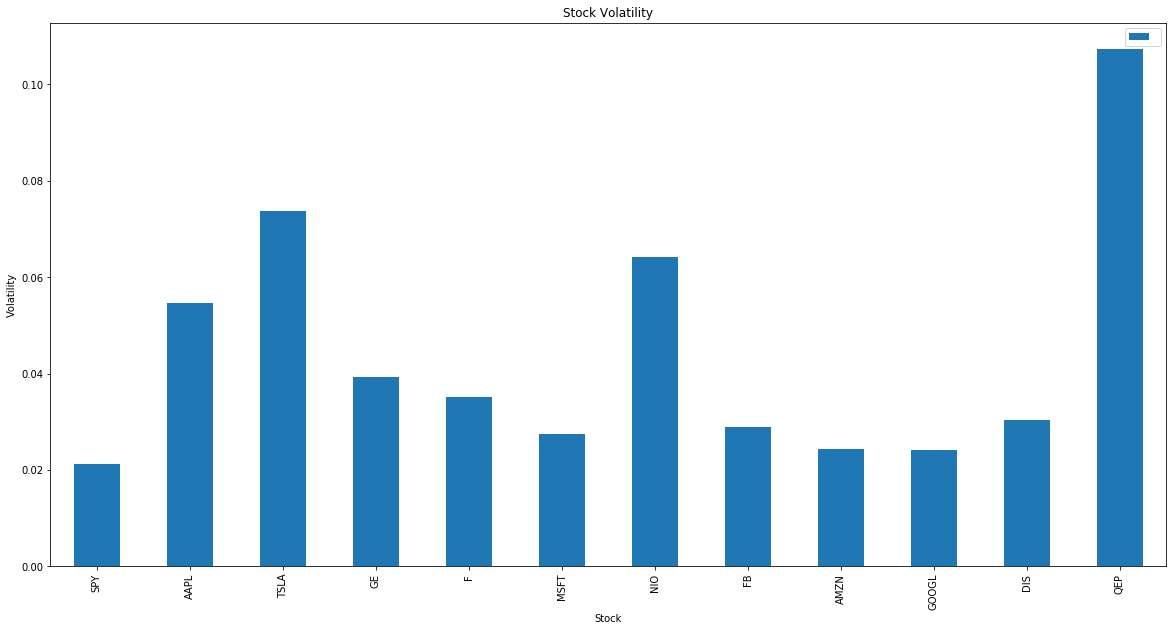

In [671]:
df_vola.plot(kind="bar", figsize=(20,10))
plt.title("Stock Volatility")
plt.xlabel("Stock")
plt.ylabel("Volatility")

In [672]:
import plotly.express as px

In [673]:
beta_risk = []

for value in beta_df["Beta"]:
    if value > 0 and value < 1:
        beta_risk.append("low")
    elif value > 1 and value < 2:
        beta_risk.append("medium")
    elif value > 2 and value < 3:
        beta_risk.append("high")
    else: 
        beta_risk.append("extremely high")

beta_df["Risk"] = beta_risk
beta_df

,Beta,Risk
Stock,,
AAPL,1.166153,medium
TSLA,1.282418,medium
AMZN,0.682525,low
DIS,1.050915,medium
FB,1.004640,medium
GOOGL,0.965667,low
GE,1.227301,medium
NIO,0.872137,low
F,1.100642,medium


In [674]:
beta_to_graph = beta_df.drop(["Risk"],axis=1)

In [675]:
beta_graph = beta_to_graph.rename(columns={"" : "Volatility"})

In [676]:
bar_beta = px.bar(beta_graph, range_y= (0,2.5),title="Beta Numbers", labels={"value":"Volatility", "index":"Stock"}, width=(800), height=(600))


In [677]:
bar_beta

In [678]:
dfline = px.line(df_closing_prices, title="Stock Prices January 2020 - January 2021", labels={"value":"Price", "index":"Date"})
dfline

In [679]:
# beta_risk = []

# for value in beta_df["Beta"]:
#     if value > 0 and value < .5:
#         beta_risk.append("very low")
#     elif value > .5 and value < 1:
#         beta_risk.append("low")
#     elif value > 1 and value < 1.5:
#         beta_risk.append("medium")
#     else: 
#         beta_risk.append("high")

# beta_df["Risk"] = beta_risk
# beta_df